In [20]:
import os
import random
import matplotlib.pyplot as plt
import tqdm

from bbchallenge import *

In [2]:
DB_PATH = "all_5_states_undecided_machines_with_global_header"

In [3]:
header = get_header(DB_PATH)
undecided_time, undecided_space, undecided_total = int.from_bytes(header[:4],byteorder='big'),int.from_bytes(header[4:8],byteorder='big'),int.from_bytes(header[8:12],byteorder='big')
print(undecided_time, undecided_space, undecided_total)

14322029 74342035 88664064


# Context

We want a heuristic to determine if a machine has a "ping-pong" behavior such as these ones:

## Unilateral pongs

9755023
s    0    1
---  ---  ---
A    1RB  ???
B    0LC  0RA
C    0RE  0LD
D    1RE  1LC
E    0LD  1LA


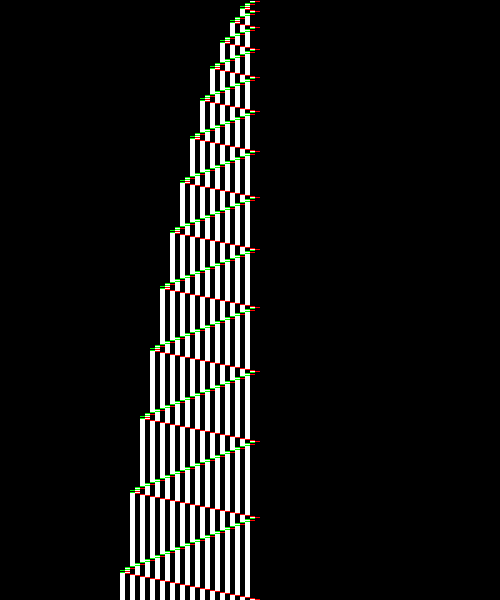

In [62]:
n = random.choice(zoo.unilateral_pongs)
print(n)
pptm(get_machine_i(DB_PATH,n))
img = tm_trace_to_image(get_machine_i(DB_PATH,n), origin=0.5, width=100, height=600, show_head_direction=True).resize((500,600), Image.NEAREST)
img

## Bilateral pongs

8818662
s    0    1
---  ---  ---
A    1RB  1RD
B    0LC  1LA
C    0RA  1LC
D    1LE  0RC
E    ???  1LB


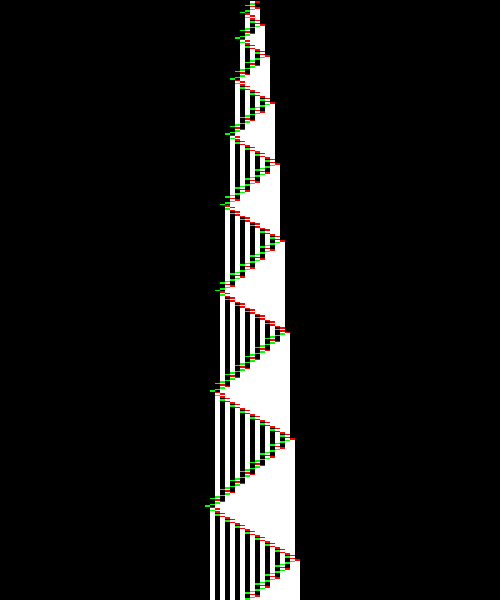

In [63]:
n = random.choice(zoo.bilateral_pongs)
print(n)
pptm(get_machine_i(DB_PATH,n))
img = tm_trace_to_image(get_machine_i(DB_PATH,n), origin=0.5, width=100, height=400, show_head_direction=True).resize((500,600), Image.NEAREST)
img

# Polynomial Passage Times Heuristic

We reason that the sequence of time steps at which the head is at cells that are relatively close to the origin must be polynomial. We care about relatively close cells to the origin because it means that the machine enters the polynomial behavior quickly. That constraint was found to be necessary for the heuristic to pass the tests on the examples and counter-examples we have.

Recognising polynomial sequences is not hard: the nth sequence of differences is null.

In [26]:
def simulate_and_get_passage_times(machine, time_limit = 100000):
    curr_time = 0
    curr_state = 0
    curr_pos = 0
    tape = {}
    passage_times = {}
    
    while curr_state != None and curr_time < time_limit:
        if not curr_pos in passage_times:
            passage_times[curr_pos] = []
        passage_times[curr_pos].append(curr_time)
        
        curr_state, curr_pos = step(machine, curr_state, curr_pos, tape)
        
        # Halt!
        if curr_state is None:
            return passage_times
        curr_time += 1
    
    return passage_times
        

In [7]:
def diff_n(l,n=1):
    lc = l[:]
    def diff(l):
        if len(l) < 2:
            return []
        to_ret = []
        for i in range(1,len(l)):
            to_ret.append(l[i]-l[i-1])
        return to_ret
    for i in range(n):
        lc = diff(lc)
    return lc

## Example n = 12301430

13795582
s    0    1
---  ---  ---
A    1RB  1RB
B    1LC  0LD
C    ???  1LD
D    0RA  1RE
E    1RA  1LC


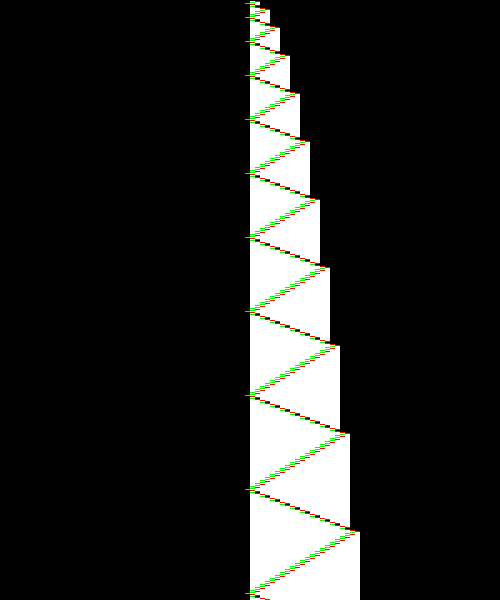

In [64]:
n = 13795582
print(n)
pptm(get_machine_i(DB_PATH,n))
img = tm_trace_to_image(get_machine_i(DB_PATH,n), origin=0.5, width=100, height=600, show_head_direction=True).resize((500,600), Image.NEAREST)
img

In [9]:
passing_times = simulate_and_get_passage_times(get_machine_i(DB_PATH,n))

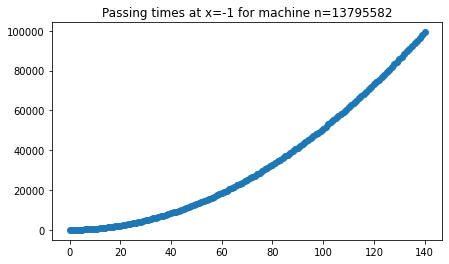

In [10]:
plt.figure(figsize=(7,4))
x=-1
plt.plot(passing_times[x], 'o')
plt.title(f"Passing times at x={x} for machine n={n}")
plt.show()

### The third differentiation is null (quadratic polynomial)
Except for small initial regime at the beginning. We require the 10 last entries to be 0.

In [11]:
print(diff_n(passing_times[x],3))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Example n = 8414269

13810851
s    0    1
---  ---  ---
A    1RB  ???
B    1LC  1RE
C    0RB  1LD
D    1LB  0RB
E    1LB  0RD


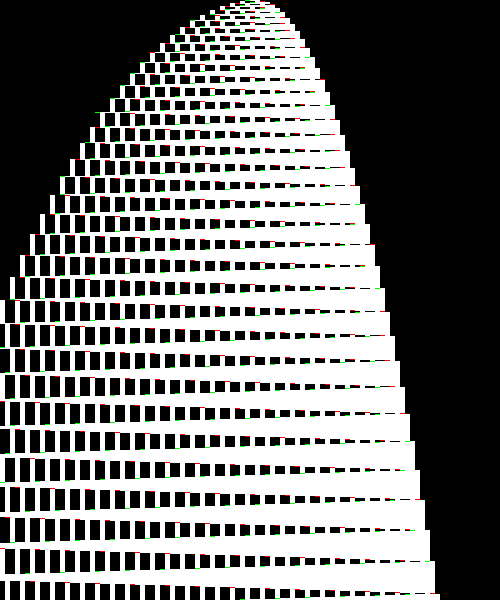

In [65]:
n = 13810851
print(n)
pptm(get_machine_i(DB_PATH,n))
img = tm_trace_to_image(get_machine_i(DB_PATH,n), origin=0.5, width=100, height=4000, show_head_direction=True).resize((500,600), Image.NEAREST)
img

In [13]:
passing_times = simulate_and_get_passage_times(get_machine_i(DB_PATH,n))

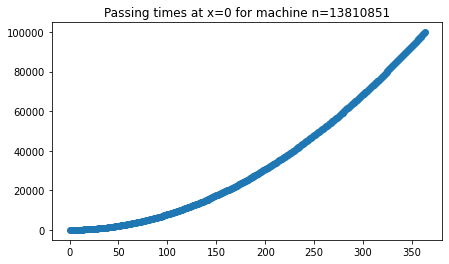

In [14]:
plt.figure(figsize=(7,4))
x=0
plt.plot(passing_times[x], 'o')
plt.title(f"Passing times at x={x} for machine n={n}")
plt.show()

In [15]:
print(diff_n(passing_times[x],3))

[-2, 0, -4, 8, -10, 12, -14, 16, -18, 20, -22, 24, -26, 28, -30, 32, -34, 36, -38, 40, -42, 44, -46, 48, -50, 52, -54, 56, -58, 60, -62, 64, -66, 68, -70, 72, -74, 76, -78, 80, -82, 84, -86, 88, -90, 92, -94, 96, -98, 100, -102, 104, -106, 108, -110, 112, -114, 116, -118, 120, -122, 124, -126, 128, -130, 132, -134, 136, -138, 140, -142, 144, -146, 148, -150, 152, -154, 156, -158, 160, -162, 164, -166, 168, -170, 172, -174, 176, -178, 180, -182, 184, -186, 188, -190, 192, -194, 196, -198, 200, -202, 204, -206, 208, -210, 212, -214, 216, -218, 220, -222, 224, -226, 228, -230, 232, -234, 236, -238, 240, -242, 244, -246, 248, -250, 252, -254, 256, -258, 260, -262, 264, -266, 268, -270, 272, -274, 276, -278, 280, -282, 284, -286, 288, -290, 292, -294, 296, -298, 300, -302, 304, -306, 308, -310, 312, -314, 316, -318, 320, -322, 324, -326, 328, -330, 332, -334, 336, -338, 340, -342, 344, -346, 348, -350, 352, -354, 356, -358, 360, -362, 364, -366, 368, -370, 372, -374, 376, -378, 380, -382, 3

## We sometimes have to consider subsequences

In practice our tests tuned the heuristic such that testing subsequences of the form `passing_times[::k]` for `k < 40` was enough.

In [16]:
print(diff_n(passing_times[x][::2],3))

[-6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Heuristic Code

In [17]:
def all_zero(l):
    for a in l:
        if a != 0:
            return False
    return True

In [66]:
def heuristic_polynomial_passage_times(machine, time_limit=1000000, 
                         nb_points_to_conclude = 10, 
                         max_time_begin_behavior=5, 
                         max_sampling_step = 40, debug=False):
    
    passage_times = simulate_and_get_passage_times(machine, time_limit=time_limit)

    for i in passage_times:
        for sampling_step in range(1,min(len(passage_times[i]),max_sampling_step)):
            subseq = passage_times[i][::sampling_step]
            third_derivative = diff_n(subseq,3)
            
            # enough points to conclude
            if len(third_derivative) >= nb_points_to_conclude:
                # the behavior started early enough
                if min(subseq) < max_time_begin_behavior:
                    # the last `nb_point_to_conclude` points of the third derivative are 0
                    if all_zero(third_derivative[-nb_points_to_conclude:]):
                        if debug:
                            print(i, sampling_step, len(third_derivative))
                        return True

    return False

# Testing the Heuristic

In [67]:
heuristic_polynomial_passage_times(get_machine_i(DB_PATH,13810851))

True

## Heuristic should say True

In [58]:
print(f"Testing {len(zoo.unilateral_pongs + zoo.bilateral_pongs)} machines")

Testing 134 machines


In [68]:
for n in tqdm.tqdm(zoo.unilateral_pongs + zoo.bilateral_pongs):
    if not heuristic_polynomial_passage_times(get_machine_i(DB_PATH,n)):
        print("Problem:", n)

100%|███████████████████████████████████████████████████| 134/134 [01:11<00:00,  1.88it/s]


## Heuristic should say False

In [59]:
print(f"Testing {len(zoo.translated_unilateral_pongs + zoo.smart_counters + zoo.potential_halters + zoo.halters)} machines")

Testing 35 machines


In [60]:
for n in tqdm.tqdm(zoo.translated_unilateral_pongs + zoo.smart_counters + zoo.potential_halters):
    if heuristic_polynomial_passage_times(get_machine_i(DB_PATH,n)):
        print("Problem:", n)

100%|█████████████████████████████████████████████████████| 28/28 [00:46<00:00,  1.65s/it]


In [61]:
for machine in tqdm.tqdm(zoo.halters):
    if heuristic_polynomial_passage_times(machine):
        print("Problem:", n)

100%|███████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.99it/s]
